In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train_data.txt' , sep=':::' , names=['S.No.' , 'Title','Genre', 'Summary'],engine='python')
train_data.drop('S.No.',axis =1,inplace=True)


In [3]:
test_data = pd.read_csv('test_data.txt' , sep=':::' , names=['S.No.' , 'Title', 'Summary'])
test_data.drop('S.No.',axis =1,inplace=True)
test_data

C:\Users\shrey\AppData\Local\Temp\ipykernel_17704\3990816190.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('test_data.txt' , sep=':::' , names=['S.No.' , 'Title', 'Summary'])


,Title,Summary
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [4]:
X_train = train_data.drop('Genre',axis=1)
Y_train = train_data['Genre']

In [5]:
import seaborn as sns

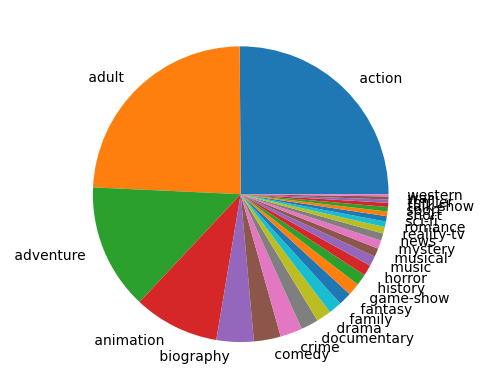

In [6]:
plt.pie(train_data["Genre"].value_counts(), labels = np.unique(train_data["Genre"]));

In [7]:
import re 
import string 
import nltk 
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
stem = LancasterStemmer
nltk.download('stopwords')
nltk.download('punkt')


stoprwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def data_clean(text) : 
    text = text.lower()
    
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    
    text = " ".join([i for i in words if i not in stoprwords and len(i)>2])

    return text

In [10]:
X_train["Formatted data"] = X_train["Summary"].apply(data_clean)

In [11]:
X_train

,Title,Summary,Formatted data
0,Oscar et la dame rose (2009),Listening in to a conversation between his do...,listening conversation doctor parents 10yearol...
1,Cupid (1997),A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",As the bus empties the students for their fie...,bus empties students field trip museum natural...
3,The Secret Sin (1915),To help their unemployed father make ends mee...,help unemployed father make ends meet edith tw...
4,The Unrecovered (2007),The film's title refers not only to the un-re...,films title refers unrecovered bodies ground z...
...,...,...,...
54209,"""Bonino"" (1953)",This short-lived NBC live sitcom centered on ...,shortlived nbc live sitcom centered bonino wor...
54210,Dead Girls Don't Cry (????),The NEXT Generation of EXPLOITATION. The sist...,next generation exploitation sisters kapa bay ...
54211,Ronald Goedemondt: Ze bestaan echt (2008),"Ze bestaan echt, is a stand-up comedy about g...",bestaan echt standup comedy growing facing fea...
54212,Make Your Own Bed (1944),Walter and Vivian live in the country and hav...,walter vivian live country difficult time keep...


In [12]:
X_test = test_data
Y_test= pd.read_csv('test_data_solution.txt',sep=':::',names=['S.No.','Genre','Summary'])
Y_test = Y_test['Genre']
X_test['Formatted Data']= X_test['Summary'].apply(data_clean)

C:\Users\shrey\AppData\Local\Temp\ipykernel_17704\480709179.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  Y_test= pd.read_csv('test_data_solution.txt',sep=':::',names=['S.No.','Genre','Summary'])


In [13]:
Y_test

1            thriller 
2              comedy 
3         documentary 
4               drama 
5               drama 
             ...      
54196          horror 
54197         western 
54198           adult 
54199           drama 
54200           drama 
Name: Genre, Length: 54200, dtype: object

In [14]:
X_test

,Title,Summary,Formatted Data
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",brane loves life car apartment job especially ...
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march 1964 quico naughty child three bel...
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherds north tra...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died hasnt spoken brother years serious...
4,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial arts superstar b...
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da...",covering multiple genres tales light dark anth...
54196,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...,alice cora munro attempt find father british o...
54197,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...,movie 169 years making oliver twist artful dod...
54198,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard...",popular mysterious rock mike mallard askew bro...


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)
Y_train = le.fit_transform(Y_train)

In [16]:
np.unique(Y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [17]:
vect = TfidfVectorizer(max_features = 10000)

# train_data = vect.fit_transform(X_train['Formatted data'])
test_data = vect.fit_transform(X_test['Formatted Data'])

In [ ]:
train_data

In [18]:
test_data

<54200x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 2217536 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.svm import SVC

model = SVC()

In [29]:
model.fit(train_data,Y_train)

SVC()

In [30]:
import joblib 
joblib.dump(model,'genre_1.pkl')

['genre_1.pkl']

In [19]:
import joblib
model = joblib.load('genre_1.pkl')

In [20]:
yhat = model.predict(test_data)

In [21]:
for i in range(len(yhat)):
    print(yhat[i] , Y_test[i])

8 24
5 5
7 7
8 8
7 8
7 13
8 8
8 5
7 7
7 8
8 8
7 8
8 8
5 8
8 21
7 7
8 5
8 26
8 7
8 7
8 21
5 8
8 7
8 7
7 7
8 7
7 8
7 9
8 22
5 13
5 26
8 8
8 7
7 5
8 8
5 7
8 8
8 19
7 25
21 8
8 21
8 11
5 21
7 7
8 7
7 7
8 5
8 5
5 8
8 7
8 8
8 8
8 5
8 13
7 4
7 7
7 8
8 1
8 5
7 7
8 21
7 8
8 8
8 8
8 8
7 23
7 9
21 7
5 5
5 5
8 7
7 8
8 8
8 8
21 21
7 7
7 13
8 8
7 5
7 7
7 7
8 13
7 7
7 8
7 5
8 13
7 0
7 7
7 7
7 0
5 8
8 7
7 7
7 8
8 8
7 14
8 7
7 8
7 13
8 8
8 7
7 21
8 7
7 21
8 7
8 8
7 8
7 5
8 7
8 8
7 7
8 8
8 8
8 7
5 7
7 21
8 7
8 21
5 6
7 8
5 7
8 5
8 8
8 8
8 7
8 5
8 8
8 21
8 0
7 8
7 8
8 24
8 8
7 7
7 7
7 5
21 3
8 7
8 8
7 21
8 1
8 8
7 7
7 8
5 7
7 20
8 8
5 9
8 21
8 8
5 22
7 26
5 7
7 8
5 13
8 8
5 5
8 13
7 21
5 5
7 5
8 8
7 8
7 21
8 7
7 7
7 5
8 0
8 26
7 7
7 13
8 8
7 7
7 8
8 5
7 21
7 7
7 2
7 8
5 7
7 5
7 7
8 7
7 14
8 5
21 14
5 8
8 7
8 24
8 23
5 5
5 5
7 8
8 8
5 19
7 7
5 0
7 18
5 5
8 7
8 8
8 8
8 8
8 8
7 7
7 8
7 7
7 7
8 8
8 8
7 14
7 21
7 5
8 8
8 8
7 8
8 21
5 8
8 13
7 7
8 8
7 25
8 7
8 8
8 8
7 7
8 8
7 7
7 6
8 21
21 13
7 8
8 7
7 8
7 13


7 0
7 8
8 7
7 8
8 13
7 7
5 20
7 8
7 12
8 8
8 8
5 8
7 21
7 7
7 21
8 8
5 8
8 7
5 8
7 21
8 0
7 21
7 7
8 8
7 7
8 9
8 7
5 18
5 8
21 5
7 8
8 8
8 21
8 4
8 5
7 7
21 21
8 8
8 7
5 13
8 0
8 0
21 7
5 8
7 8
5 7
7 7
7 24
8 8
5 5
8 5
8 8
7 7
7 22
5 19
8 6
8 8
5 8
8 19
5 24
8 5
7 0
21 9
7 13
8 9
5 5
7 21
7 8
7 13
8 8
5 5
8 8
8 21
5 5
8 8
5 8
8 24
7 8
8 5
7 20
7 18
5 7
8 26
7 5
8 8
7 0
7 5
24 13
8 8
8 24
8 14
7 7
21 24
7 7
21 20
8 12
5 8
7 7
8 5
7 7
8 7
7 21
7 7
8 7
5 21
8 5
7 7
7 13
7 18
8 5
5 7
21 1
7 7
7 8
7 7
8 8
7 8
7 7
7 7
8 18
5 7
8 26
8 5
7 10
8 8
8 24
21 5
7 8
7 7
8 24
7 8
7 8
7 7
8 8
8 7
8 7
8 1
21 7
8 13
5 26
8 8
8 8
8 8
7 7
8 5
7 26
7 7
5 21
8 7
7 7
8 7
8 0
21 7
8 24
8 8
7 21
5 21
7 6
7 6
8 7
7 7
7 8
5 8
7 5
8 26
5 5
8 1
8 8
8 8
7 8
5 7
21 21
8 8
8 8
5 5
8 7
21 8
7 7
7 0
5 21
8 6
7 8
5 0
8 16
8 8
8 5
5 21
8 7
8 18
7 8
7 21
8 7
7 7
8 5
8 19
7 14
8 13
7 5
7 7
8 8
5 8
8 7
7 5
7 7
8 14
8 6
7 5
7 5
8 2
8 21
5 22
7 7
7 7
8 23
7 8
8 21
7 8
8 7
5 3
7 7
8 20
7 18
7 8
8 7
8 7
8 5
8 5
21 7
7 21
5 7
5 